<a href="https://colab.research.google.com/github/ramyaranjanrath/MLP/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [7]:
data.shape

(1599, 12)

In [8]:
feature_list = data.columns[:-1].values #why .values?
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [17]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

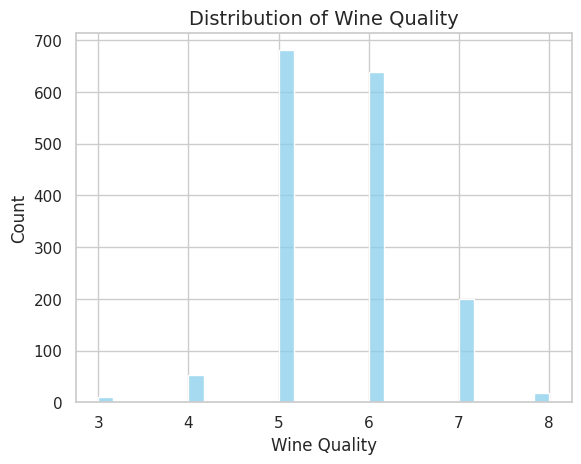

In [24]:
sns.set(style = 'whitegrid')
sns.histplot(data.quality, kde=False, color='skyblue', edgecolor='white')
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Wine Quality', fontsize=14)
plt.show()

In [33]:
# def split_train_test(data, test_ratio):
#   #set a random seed
#   np.random.seed(42)

#   #suffle the indices
#   suffled_indices = np.random.permutation(len(data))

#   #set the test set size
#   test_set_size = int(len(data) * test_ratio)

#   #separate the test indices and train indices
#   test_indices = suffled_indices[:test_set_size]
#   train_indices = suffled_indices[test_set_size:]

#   return data.iloc[train_indices], data.iloc[test_indices]

In [35]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split_logic = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_logic.split(data, data["quality"]):
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]